In [1]:
import ipywidgets as widgets
from IPython.display import display

## Simple examples

In [2]:
slider = widgets.FloatSlider(description='$x$', value=4)
text = widgets.FloatText(
    disabled=True, 
    value = slider.value ** 2,
    description='$x^2$'
)

def compute(*args):
    text.value = str(slider.value ** 2)
    
slider.observe(compute, 'value')

view = widgets.VBox([slider, text])
display(view)

In [3]:
a = widgets.FloatText()
b = widgets.FloatSlider()

display(a,b)
mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

In [ ]:
# mylink.unlink()

### Linking

In [4]:
fwidg_paps = widgets.FloatSlider(
    value=47.2,
    min=0,
    max=100.0,
    step=0.1,
    description='Age of Paps:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)

fwidg_mams = widgets.FloatSlider(
    value=fwidg_paps.value - 4,
    min=0,
    max=100.0,
    step=0.1,
    description='Age of Mams:',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)

display(widgets.HBox([fwidg_paps, fwidg_mams]))

def update_paps(*args):
    fwidg_paps.value = fwidg_mams.value + 4
    
def update_mams(*args):
    fwidg_mams.value = fwidg_paps.value - 4
    
fwidg_mams.observe(update_paps, 'value')
fwidg_paps.observe(update_mams, 'value')

# observe(func, attribute_name) means: 
# If I change, please run the function if the attrubute with
#     name attribute_name is changed.

In [ ]:

widgets.FloatProgress(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Loading:',
    bar_style='info',
    orientation='horizontal',

)

In [6]:
txt = widgets.Text()
options=list(range(8))
main_title = widgets.Label("Cycle selector")
description = widgets.Label("Select one")
sel = widgets.Select(
    options=options,
    value=options[0],
    rows=10,
    #description='Select one:',
    disabled=False,
    layout=widgets.Layout(width='5%', height='120px'),
)
def set_txt(*args):
    txt.value = str(sel.value)
    
sel.observe(set_txt, 'value')

row1 = widgets.VBox([main_title, txt])
row2 = widgets.VBox([description, sel])
#display(widgets.VBox([row1, row2]))

### Multiselect cycles

In [11]:
sel.keystxt = widgets.Text()
options=list(range(100))
sel = widgets.SelectMultiple(
    options=options,
    value=[options[0]],
    rows=10,
    # description='Select one:',
    disabled=False,
    layout=widgets.Layout(width='3.2em', height='120px'),
)
def set_txt(*args):
    txt.value = str(sel.value)
    
sel.observe(set_txt, 'value')

display(widgets.VBox([txt, sel]))

In [ ]:
s = widgets.FileUpload(
    accept='.csv',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
    
)
display(s)

In [ ]:
if s.value:
    files = next(iter(s.value.values()))
    meta = files['metadata']
    name = meta['name']
    label = widgets.Label(f'got: {name}')
    txtarea = widgets.Textarea(
        s.data[0], 
        layout=widgets.Layout(width='50%', height='130px')
    )
    display(widgets.VBox([label, txtarea]))

In [ ]:
from io import StringIO
import pandas as pd
raw = StringIO(str(s.data[0], 'utf-8'))
df = pd.read_csv(raw, sep=";")
df.head()

In [ ]:
import markdown 

html = markdown.markdown("""# Markdown""")
widgets.HTML(
    html,
)

In [12]:
caption = widgets.Label(value='The values of slider1 and slider2 are synchronized')
sliders1, slider2 = widgets.IntSlider(description='Slider 1'),\
                    widgets.IntSlider(description='Slider 2')
l = widgets.link((sliders1, 'value'), (slider2, 'value'))
display(caption, sliders1, slider2)

Label(value='The values of slider1 and slider2 are synchronized')

IntSlider(value=0, description='Slider 1')

IntSlider(value=0, description='Slider 2')

## Threading

In [ ]:
import threading
from IPython.display import display
import ipywidgets as widgets
import time
progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)

def work(progress):
    total = 100
    for i in range(total):
        time.sleep(0.2)
        progress.value = float(i+1)/total

thread = threading.Thread(target=work, args=(progress,))
display(progress)
thread.start()

## Fitting

In [13]:
import numpy as np

In [14]:
from lmfit.models import LorentzianModel

In [15]:
from scipy.stats import cauchy
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

In [17]:
center = 10
x = np.linspace(0.0, 2*center, 100)
err = (np.random.random(len(x))-0.5) / 30
y = cauchy.pdf(x-center) + err

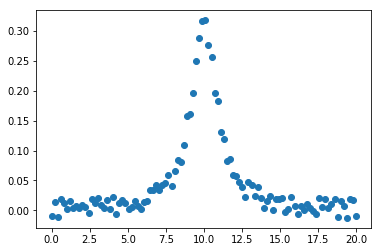

In [18]:
plt.plot(x,y, 'o')

In [19]:
model = LorentzianModel()
params = model.guess(y, x=x)

In [20]:
params

name,value,initial value,min,max,vary,expression
amplitude,1.25201263,None,-inf,inf,True,
center,9.89898990,None,-inf,inf,True,
sigma,1.01010101,None,0.00000000,inf,True,
fwhm,2.02020202,None,-inf,inf,False,2.0000000*sigma
height,0.39454273,None,-inf,inf,False,"0.3183099*amplitude/max(2.220446049250313e-16, sigma)"


In [21]:
result = model.fit(y, params, x=x)

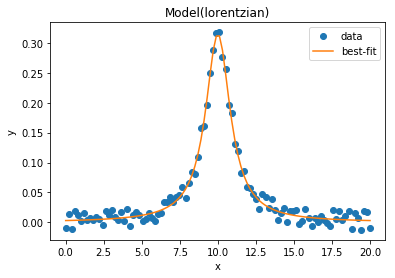

In [22]:
result.plot_fit()

In [23]:
# create the model
model = LorentzianModel(prefix="D")

# set initial values
model.set_param_hint("Damplitude", value=1.1, vary=True)
model.set_param_hint("Dcenter", value=7.01, vary=True)

# get parameters to use in the model
#   - by guessing
params_guessed = model.guess(y, x=x)

#   - as initial set
params = model.make_params()

In [24]:
params_guessed

name,value,initial value,min,max,vary,expression
Damplitude,1.25201263,None,-inf,inf,True,
Dcenter,9.89898990,None,-inf,inf,True,
Dsigma,1.01010101,None,0.00000000,inf,True,
Dfwhm,2.02020202,None,-inf,inf,False,2.0000000*Dsigma
Dheight,0.39454273,None,-inf,inf,False,"0.3183099*Damplitude/max(2.220446049250313e-16, Dsigma)"


In [25]:
# set individual parameters
params['Damplitude'].value = 1

In [26]:
# calculate the model using the initial values
init_y = model.eval(params, x=x)

# do a fit and retrieve the result
result = model.fit(y, params, x=x)

In [173]:
result

In [27]:
# get the fitted parameters
new_params = result.params

# get goodness of fit
gof = result.chisqr

# calculate the model using fitted values
#  (can probably also be done using model.eval(new_params, x=x))
comps = result.eval_components()

In [28]:
print(f"Xhi**2: {gof:0.3f}")

Xhi**2: 0.009


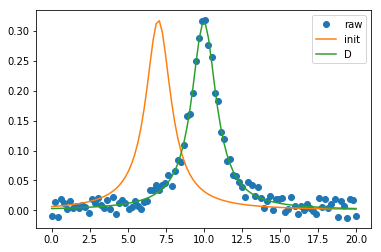

In [29]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label="raw")
ax.plot(x, init_y, label="init")
for k, c in comps.items():
    ax.plot(x, c, label=k)
ax.legend()

### Interactive fitter

In [96]:
class CustomWidget(widgets.VBox):
    
    def __init__(self, name="Custom", 
                 value=2.0, minimum=0.0, maximum=20.0, 
                 vary=True, expression=None,
                 minimum_span=1.0,
                 layout=None,
                ):
        self.min_span = minimum_span
        self.w_name = widgets.Label(f"Parameter: {name}")
        self.w_value = widgets.FloatSlider(
            value=value, 
            min = minimum,
            max = maximum,
            continuous_update=False,
            #description="VALUE",
        )
        
        self.w_min = widgets.FloatText(
            value=minimum, 
            #description="MIN",
            continuous_update=False,
            layout=widgets.Layout(width='3.2em'),
        )
        self.w_max = widgets.FloatText(
            value=maximum, 
            #description="MAX",
            continuous_update=False,
            layout=widgets.Layout(width='3.2em'),
        )
        
        self.w_vary = widgets.Checkbox(value=vary, description="VARY")
        
        if expression:
            self.w_expression = widgets.Text(value=expression, description="EXPR.")
            
        if layout:
            super(CustomWidget, self).__init__(layout=layout)
        else:
            super(CustomWidget, self).__init__()
            
        self.w_min.observe(self.update_value, 'value')
        self.w_max.observe(self.update_value, 'value')
        
        self.b_value = widgets.HBox([self.w_min, self.w_value, self.w_max])
        
        self.children = [
                self.w_name,
                self.b_value,
                self.w_vary, 
            ]
        if expression:
            self.children.append(self.w_expression)


    def update_value(self, *args):
        
        if self.w_max.value <= self.w_min.value:
            self.w_max.value = self.w_min.value + self.min_span
            #self.w_value.value = self.w_min.value
            
        if self.w_value.value <= self.w_min.value:
            self.w_value.value = self.w_min.value
            
        if self.w_value.value >= self.w_max.value:
            self.w_value.value = self.w_max.value
            
        self.w_value.min = self.w_min.value
        self.w_value.max = self.w_max.value
            
        span = self.w_value.max - self.w_value.min
        self.w_value.step = span/20
        

In [243]:
model = LorentzianModel()
params = model.make_params()

plot_output = widgets.Output()
log_output = widgets.Output()

guess_button = widgets.Button(description="Guess")
fit_button = widgets.Button(description="Fit")
clear_button = widgets.Button(description="Clear")

buttons = widgets.HBox([guess_button, fit_button, clear_button])
prm_name = 'center'

c = CustomWidget(name=prm_name, value=4.2, minimum_span=0.2) # layout=widgets.Layout(border='solid 2px'))
#c.layout.max_width = "50%"

def create_plot(init_y):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', label="raw")
    ax.plot(x, init_y, label="init")
    plt.show()

    
def set_params(new_params):
    with log_output:
        for k in params.keys():
            params[k] = new_params[k]
            # print(new_params[k])

def update_params(change):
    params[prm_name].value = c.w_value.value
    params[prm_name].min = c.w_value.min
    params[prm_name].max = c.w_value.max
    params[prm_name].vary = c.w_vary.value
    
def update_plot(change):
    plot_output.clear_output(wait=True)
    init_y = model.eval(params, x=x)
    with plot_output:
        create_plot(init_y)
        
def _lookup(obj, prm, attr='value', on='value'):
    v = getattr(prm, attr)
    if (v != np.inf and v != -np.inf) and isinstance(v, (float, int)):
        setattr(obj, on, v)

        
def update_c():
    _lookup(c.w_value, params[prm_name], 'value', 'value')
    _lookup(c.w_value, params[prm_name], 'min', 'min')
    _lookup(c.w_value, params[prm_name], 'max', 'max')
    _lookup(c.w_vary, params[prm_name], 'vary', 'value')
    _lookup(c.w_min, params[prm_name], 'min', 'value')
    _lookup(c.w_max, params[prm_name], 'max', 'value')
        
def on_guess(b):
    log_output.clear_output()
    set_params(model.guess(y, x=x))
    update_c()
    with log_output:
        print(" guessing ".center(20, "-"))
        
def on_fit(b):
    log_output.clear_output()
    result = model.fit(y, params, x=x)
    new_params = result.params
    set_params(model.guess(y, x=x))
    update_c()
    with log_output:  
        print(" fitting ".center(20, "-"))
        display(result)
        
def on_clear(b):
    log_output.clear_output()
    
c.w_value.observe(update_params, 'value')
c.w_value.observe(update_plot, 'value')
c.w_min.observe(update_params, 'value')
c.w_max.observe(update_params, 'value')
c.w_vary.observe(update_params, 'value')

guess_button.on_click(on_guess)
fit_button.on_click(on_fit)
clear_button.on_click(on_clear)

update_params(None)
update_plot(None)

In [244]:
out = widgets.VBox([c, plot_output, buttons, log_output])

In [245]:
out